In [268]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [279]:
Kb_T=4.1
dt=5.0e-6
t=4.0
tiempo=int(t/dt)
k10=6.01  
k20=0.007
k12=0.21
k21=0.105
x10=1.37*1e-1
x20=1.76*1e-1
x12=8.58*1e-1
x21=-4.2*1e-1

repeticiones=50
cambios=4
fuerzas=zeros(cambios)

fuerzas[0]=16.0
fuerzas[1]=4.0
fuerzas[2]=2.0
fuerzas[3]=0.01


evolucion=zeros((cambios,tiempo))


In [280]:
def salir_de_estado(estado,f):
    if (estado==1.0):
        respuesta=k10*exp(x10*f/(Kb_T))*dt    
    elif (estado==2.0):
        respuesta=k20*exp(x20*f/(Kb_T))*dt
    return respuesta        
def cambiar_de_estado(estado, f):
    if (estado==2.0):
        respuesta=k21*exp(x21*f/(Kb_T))*dt            
    elif (estado==1.0):
        respuesta=k12*exp(x12*f/(Kb_T))*dt 
    return respuesta

In [281]:
for j in range (0,cambios):
    fuerza=fuerzas[j]
    print j
    for k in range (0,repeticiones):
        estado=1.0
        contador=100
        for i in range (0,tiempo):     
            p=random.uniform(size=2)
            if (cambiar_de_estado(estado,fuerza)>p[0]):
                if(estado ==2.0):
                    estado=1.0
                elif (estado ==1.0):
                    estado=2.0
            if (salir_de_estado(estado,fuerza)>p[1]):
                evolucion[j][:i]+=ones(i)
                break
                
evolucion=evolucion/repeticiones               

0
1
2
3


(0, 0.2)

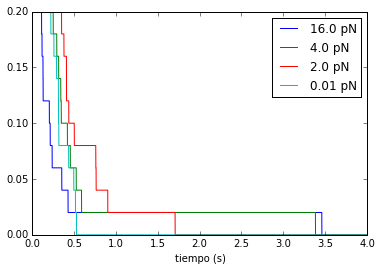

In [286]:
x=linspace(0,t,tiempo)

plot(x,evolucion[0],label="16.0 pN")
plot(x,evolucion[1],label="4.0 pN")
plot(x,evolucion[2],label="2.0 pN")
plot(x,evolucion[3],label="0.01 pN")
xlabel("tiempo (s)")
plt.legend()
ylim(0,0.2)

array([[ 0.76,  0.76,  0.76, ...,  0.  ,  0.  ,  0.  ],
       [ 0.98,  0.98,  0.98, ...,  0.  ,  0.  ,  0.  ],
       [ 0.98,  0.98,  0.98, ...,  0.  ,  0.  ,  0.  ],
       [ 0.98,  0.98,  0.98, ...,  0.  ,  0.  ,  0.  ]])